<a href="https://colab.research.google.com/github/outer00/lab/blob/lab/%D0%BB%D0%B0%D0%B1%D0%B0%20%D0%B0%D1%80%D0%B8%D1%84%D1%83%D0%BB%D0%B8%D0%BD%20%D1%8D%D0%BC%D0%B8%D0%BB%D1%8C%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gp

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

{'items': [],
 'found': 0,
 'pages': 1,
 'page': 0,
 'per_page': 10,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=1&enable_snippets=true&items_on_page=10&text=%D0%A4%D0%B8%D0%B7%D0%B8%D0%BA-%D1%8F%D0%B4%D0%B5%D1%80%D1%89%D0%B8%D0%BA'}

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
professions = ['Erlang-разработчик','Дегустатор', 'Матрос', 'Конфликтолог', 'Звукорежиссер']
params = [{'text': profession, 'area': 1, 'page': 0, 'per_page': 40} for profession in professions]
data = [requests.get(URL, param).json() for param in params]
data

[{'items': [{'id': '90599106',
    'premium': False,
    'name': 'Erlang разработчик',
    'department': None,
    'has_test': False,
    'response_letter_required': False,
    'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
    'salary': {'from': 200000,
     'to': 450000,
     'currency': 'RUR',
     'gross': False},
    'type': {'id': 'open', 'name': 'Открытая'},
    'address': {'city': 'Москва',
     'street': 'Береговой проезд',
     'building': '5Ак1',
     'lat': 55.755023,
     'lng': 37.509245,
     'description': None,
     'raw': 'Москва, Береговой проезд, 5Ак1',
     'metro': None,
     'metro_stations': [],
     'id': '6456882'},
    'response_url': None,
    'sort_point_distance': None,
    'published_at': '2024-05-06T06:11:37+0300',
    'created_at': '2024-05-06T06:11:37+0300',
    'archived': False,
    'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=90599106',
    'show_logo_in_search': None,
    'insider_interview'

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
print(*[f'{professions[i]}: {data[i]["found"]} вакансий' for i in range(5)], sep='\n')

Erlang-разработчик: 2 вакансий
Дегустатор: 3 вакансий
Матрос: 16 вакансий
Конфликтолог: 17 вакансий
Звукорежиссер: 35 вакансий


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, data):
      self.name = data['department']['name'] if 'department' in data.keys() and isinstance(data['department'], dict) and 'name' in data['department'].keys() else 0
      self.lat = data['address']['lat'] if 'address' in data.keys() and isinstance(data['address'], dict) and 'lat' in data['address'].keys() else 0
      self.lng = data['address']['lng'] if 'address' in data.keys() and isinstance(data['address'], dict) and 'lng' in data['address'].keys() else 0

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = [[Company(data[profession]['items'][vacancy]) for vacancy in range(data[profession]['found'])] for profession in range(5)]

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
companies_with_coords = [[companies[profession][vacancy].lat not in [0, None] for vacancy in range(data[profession]['found'])] for profession in range(5)]
print(*[f'{professions[i]}: {sum(companies_with_coords[i])} из {data[i]["found"]} вакансий у которых заданы координаты' for i in range(5)], sep='\n')

Erlang-разработчик: 1 из 2 вакансий у которых заданы координаты
Дегустатор: 2 из 3 вакансий у которых заданы координаты
Матрос: 12 из 16 вакансий у которых заданы координаты
Конфликтолог: 6 из 17 вакансий у которых заданы координаты
Звукорежиссер: 23 из 35 вакансий у которых заданы координаты


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
companies_in_mrr = [[companies[profession][vacancy] for vacancy in range(data[profession]['found']) if companies_with_coords[profession][vacancy] and 37.344287 <= companies[profession][vacancy].lng <= 37.879998 and 55.545493 <= companies[profession][vacancy].lat <= 55.931762] for profession in range(5)]

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

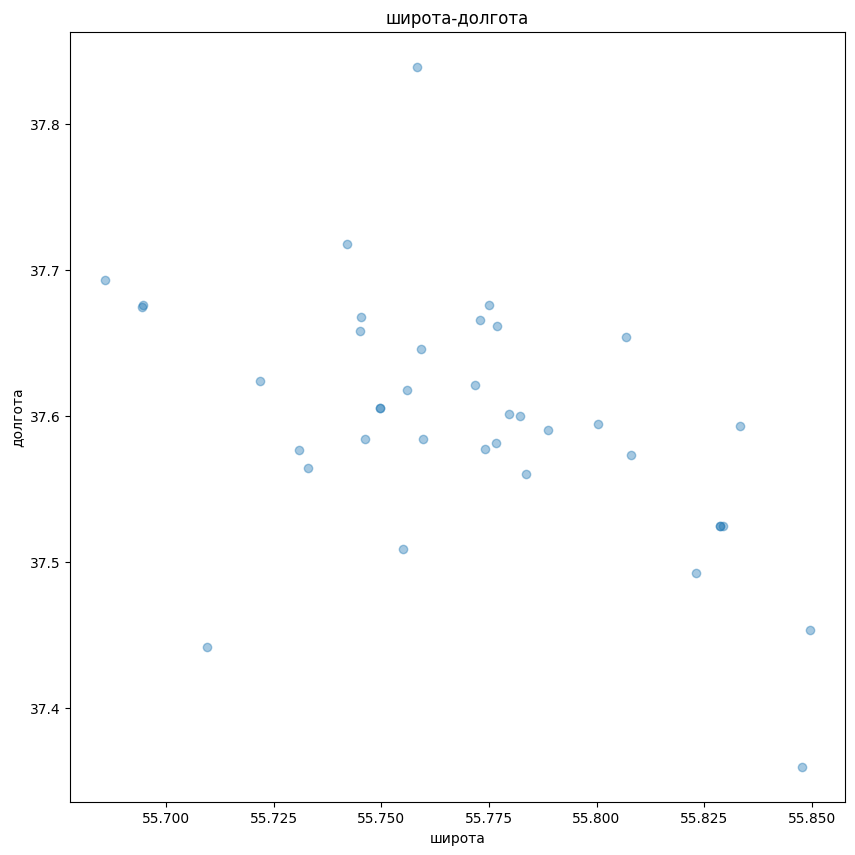

In [ ]:
plt.figure(figsize=(10, 10))
jobs = sum(companies_in_mrr, [])
lat = [jobs[i].lat for i in range(len(jobs))]
lng = [jobs[i].lng for i in range(len(jobs))]
plt.scatter(lat, lng, alpha=0.4)
plt.title('широта-долгота')
plt.xlabel('широта')
plt.ylabel('долгота')
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [ ]:
!pip install mapclassify

In [ ]:
wkts = [f'Point({lng[i]} {lat[i]})' for i in range(len(lng))]
dat = {'type': ["Company"] * len(jobs), 'name': [company.name for company in jobs]}
df = pd.DataFrame(dat)
geom = gp.GeoSeries.from_wkt(wkts)
geom = geom.set_crs(4326)
geodf = gp.GeoDataFrame(data = df, geometry = geom)
geodf.explore(max_zoom=11)

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Мы проанализировали данные по 5 непересекаемым профессиям.
Наибольшее количество вакансий расположено в центре Москвы. Это и не удивительно.
Зарплаты увеличиваются по мере приближения к центру Москвы.
Данные вакансии не пользуются спросом, что и не удивительно.
В центре Москвы требуется больше квалифицированных рабочих

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 78.9MB/s]


Создадим DataFrame:

In [ ]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
min_total_sales_price = diamonds['total_sales_price'].min()
max_total_sales_price = diamonds['total_sales_price'].max()
print(*[f'{i} - {j["total_sales_price"]}' for i,j in diamonds.iterrows() if j['total_sales_price'] in {min_total_sales_price, max_total_sales_price}], sep='\n')

0 - 200
1 - 200
2 - 200
3 - 200
4 - 200
5 - 200
6 - 200
7 - 200
8 - 200
9 - 200
10 - 200
11 - 200
12 - 200
13 - 200
14 - 200
15 - 200
16 - 200
17 - 200
18 - 200
19 - 200
20 - 200
21 - 200
22 - 200
219702 - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
has_none = columns = all_col = []
ans = 0
for i,row in enumerate(list(diamonds.columns.values)):
  if 1:
    all_col.append(row)
    result = diamonds[diamonds[row] == "unknown"].shape[0]
    result += diamonds.isnull().sum()[i]
    has_none.append(result)
    ans += result
    columns.append(row)

print(ans)

1891168


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
# your code here

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
# your code here

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
# your code here

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
# your code here

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
# your code here

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
# your code here

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
# your code here

(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
# your code here

(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
# your code here

>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# your code here

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [ ]:
# your code here

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

In [ ]:
# your code here

(2 балла) Постройте график `вес бриллианта - стоимость`:

In [ ]:
# your code here

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

In [ ]:
# your code here

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [ ]:
data = diamonds[["meas_length", "meas_width", "meas_depth", "total_sales_price"]]
data.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [ ]:
data = data.sample(frac = 1)
data.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
117129,5.79,3.87,2.50,2280
217848,10.85,8.16,5.10,56348
195085,6.51,6.55,4.08,12929
152981,5.34,5.38,3.38,3882
39555,4.31,4.33,2.68,880
156852,5.86,5.90,3.66,4239
104402,5.08,5.51,3.02,1770
157800,8.26,5.36,3.69,4445
76012,4.04,3.91,2.98,1108
90322,4.61,4.62,2.88,1384


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
# your code here

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
# your code here

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
# your code here

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

In [ ]:
# your code here

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

In [ ]:
# your code here

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)